# Ruina gracza
Proszę wykonać poprzednie zadania 1, 2, 3, 6 nie dla dwu graczy, ale dla kilku, np. 5, dla kilku różnych wartości $p_i$ (będzie wymagane ustalenie więcej niż jednego prawdopodobieństwa) przy sugerowanych kapitałach początkowych $a_i$ = 20.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 6

In [2]:
def single_game(players_fortune, players_probs):   
    if len(players_fortune) != len(players_probs):
        print("Players number not equal probs number")
        return
        
    while np.sum([x > 0 for x in players_fortune]) > 1:
        random = np.random.uniform(0, 1)
        section = 0

        for i, p in enumerate(players_probs):
            if players_fortune[i] == 0:
                continue
                
            section += p
            if random <= section:
                losers_prob = 0
                
                for fortune_index in range(len(players_fortune)):
                    if i != fortune_index and players_fortune[fortune_index] != 0:
                        players_fortune[fortune_index] -= 1
                        players_fortune[i] += 1
                        
                        if players_fortune[fortune_index] == 0:
                            losers_prob += players_probs[fortune_index]
                            players_probs[fortune_index] = 0
                    
                if losers_prob > 0:
                    new_prob = losers_prob / np.sum([x > 0 for x in players_probs])
                    for prob_index in range(len(players_probs)):
                        if players_probs[prob_index] != 0:
                            players_probs[prob_index] += new_prob
                break
                                    
    return [x > 0 for x in players_fortune]

In [3]:
def simulation(game_num, players_fortune, players_probs):
    wins_lists = [[] for _ in range(len(players_fortune))]
    
    for _ in range(game_num):
        wins = single_game(players_fortune.copy(), players_probs.copy())
        for i in range(len(players_fortune)):
            wins_lists[i].append(wins[i])
            
    cumulative_wins = [0] * len(players_fortune)
    cumulative_wins_lists = [[] for _ in range(len(players_fortune))]
    
    for i in range(game_num):
        for j in range(len(players_fortune)):
            cumulative_wins[j] += wins_lists[j][i]
            cumulative_wins_lists[j].append(cumulative_wins[j])
        
    return cumulative_wins_lists

In [4]:
def draw_plot(players_fortune, players_probs):
    game_num = 100
    
    players_wins_data = simulation(game_num, players_fortune, players_probs)
    
    x = np.arange(0, game_num + 1, 1)
        
    plt.figure(figsize=(9,5))
    
    for i in range(len(players_fortune)):
        plt.plot(x, [0] + players_wins_data[i], label=f'Player {i}')
    
    plt.title(f'Player fortune')
    plt.xlabel('Played games')
    plt.ylabel('Wins number')
    plt.legend()
    plt.show()

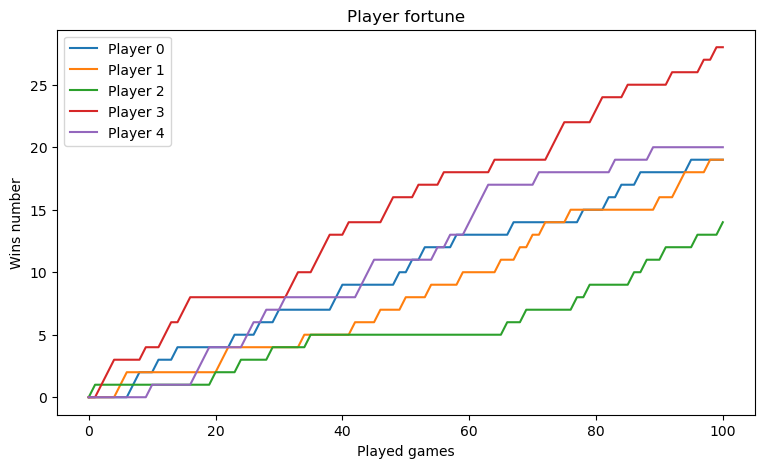

In [5]:
draw_plot([20, 20, 20, 20, 20], [0.2, 0.2, 0.2, 0.2, 0.2])

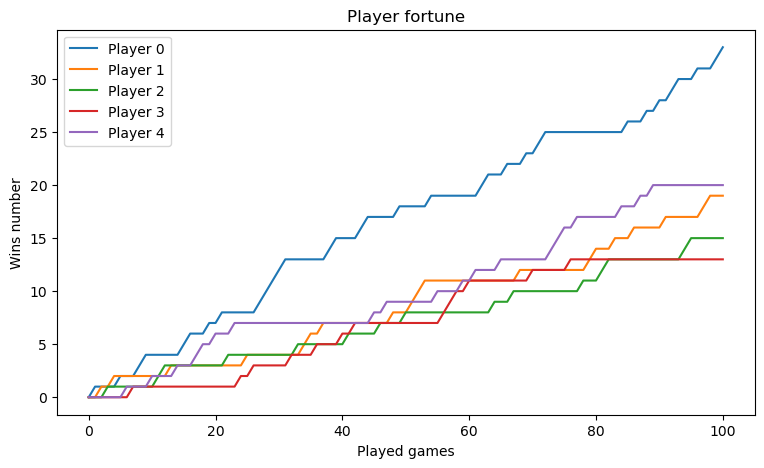

In [6]:
draw_plot([40, 15, 15, 15, 15], [0.2, 0.2, 0.2, 0.2, 0.2])

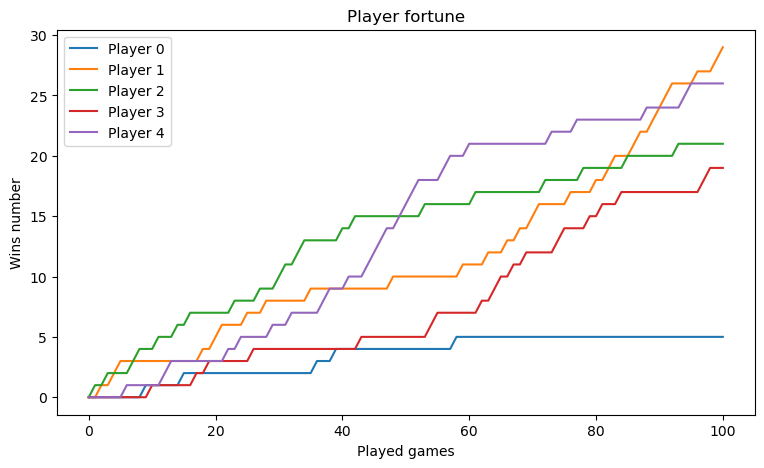

In [7]:
draw_plot([4, 24, 24, 24, 24], [0.2, 0.2, 0.2, 0.2, 0.2])

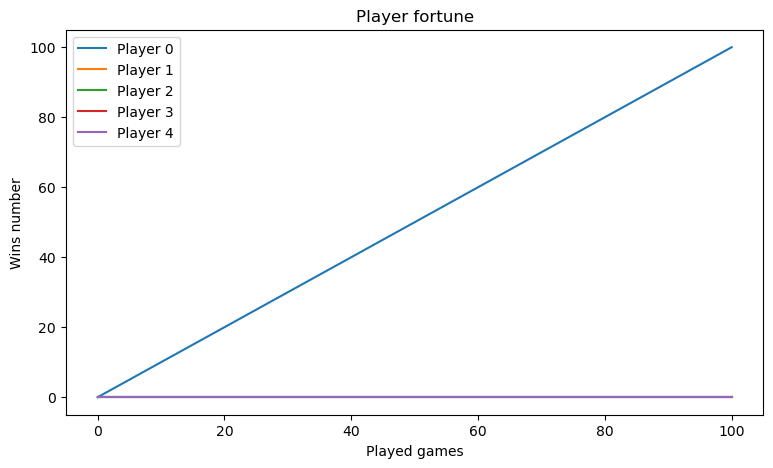

In [8]:
draw_plot([20, 20, 20, 20, 20], [0.4, 0.15, 0.15, 0.15, 0.15])

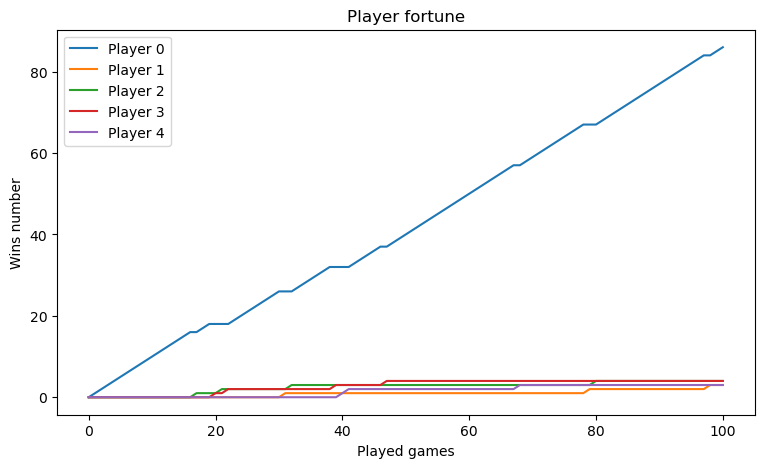

In [9]:
draw_plot([20, 20, 20, 20, 20], [0.24, 0.19, 0.19, 0.19, 0.19])

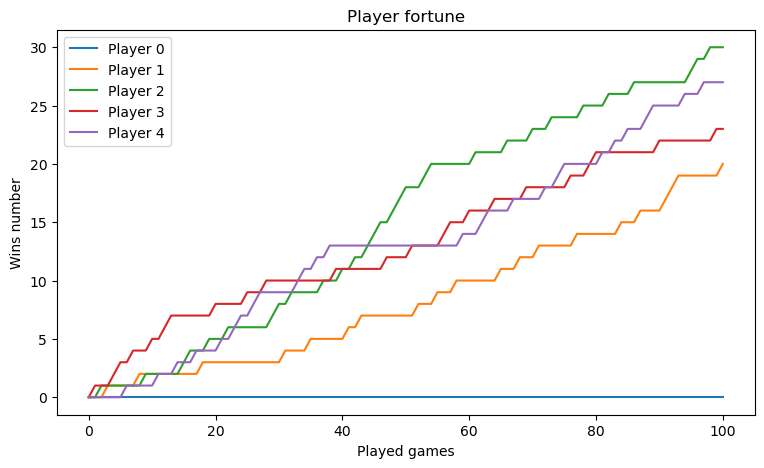

In [10]:
draw_plot([20, 20, 20, 20, 20], [0.08, 0.23, 0.23, 0.23, 0.23])

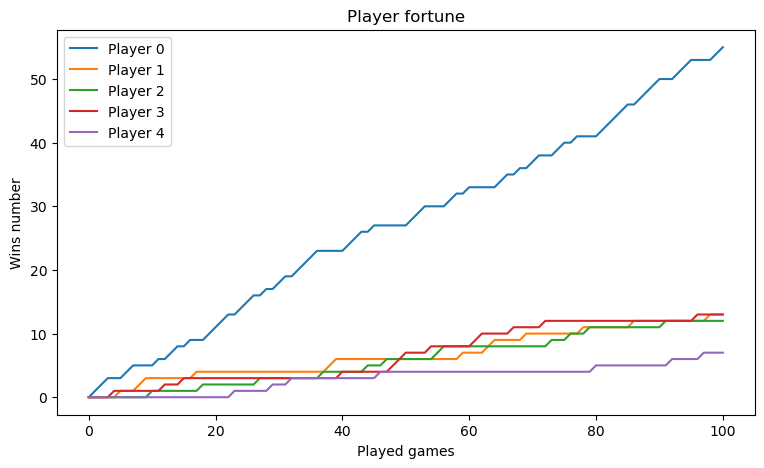

In [11]:
draw_plot([80, 5, 5, 5, 5], [0.19, 0.20, 0.21, 0.20, 0.20])

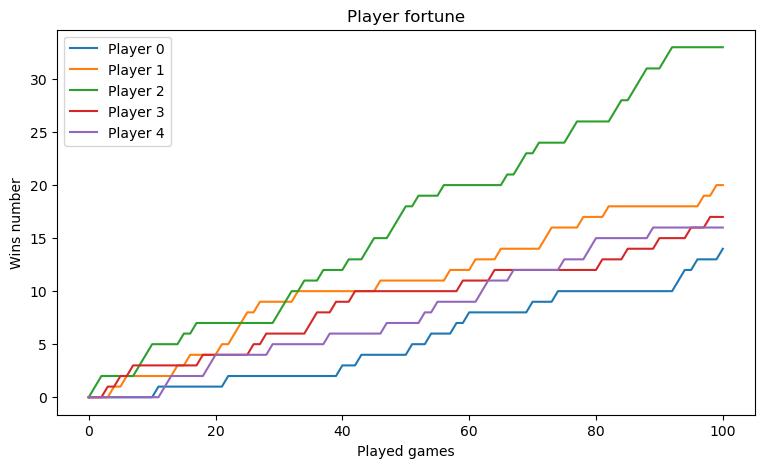

In [12]:
draw_plot([40, 15, 15, 15, 15], [0.19, 0.20, 0.21, 0.20, 0.20])

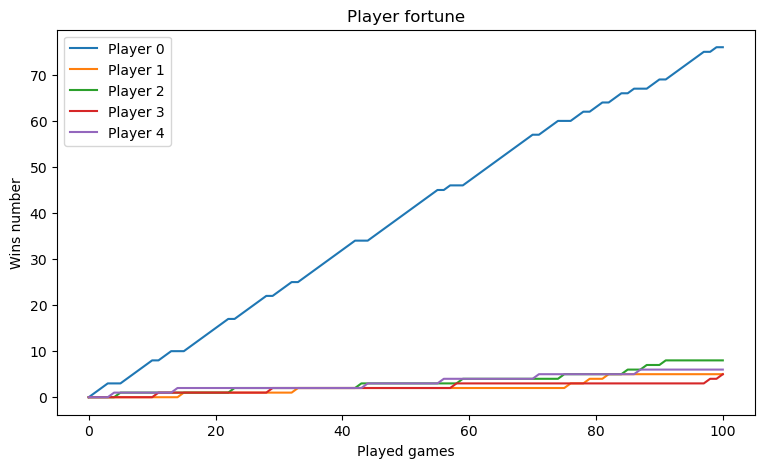

In [13]:
draw_plot([18, 20, 21, 20, 21], [0.24, 0.19, 0.19, 0.19, 0.19])

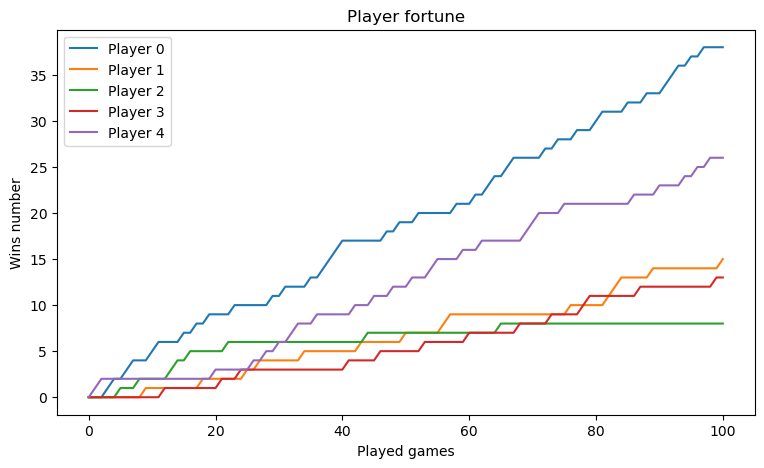

In [14]:
draw_plot([16, 21, 21, 21, 21], [0.21, 0.20, 0.19, 0.20, 0.20])